## Linear methods for regression and classification
In this jupyter notebook, we will practice the topics covered in the lectures. Specially, we will do hands-on practice of:
- load and prepare data for machine learning model training and testing
- train and test linear models (linear regression (lasso/ridge), polynomial regression, and logistic regression)
- compare and understand model performance 

For implementations that have fixed results, we provide running examples for your reference. *You might get slightly different results due to the sklearn version you are using, just leave a comment to indicate your version where you get different results.*<br>

## Linear Regression and Polynomial Regression
In this section, we will explore the diabetes dataset:
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes <br>

This dataset contains n = 442 diabetes patients' information of ten variables: age, sex, body mass index, average blood pressure, and six blood serum measurements. Each patient has a quantitative value of disease progression one year after baseline.


We will fit different regression models to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target variable <br>
    
2. Prepare data for model training and testing <br>

3. Fit different regression models (linear/lasso/ridge) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

**Note:** please always add comments to explain your observations/findings

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
# there are different ways to load the dataset, please make sure you understand the mechanism
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html
data = load_diabetes(as_frame=True)

### Basic dataset exploration 

In [4]:
data.data.shape, data.target.shape

((442, 10), (442,))

In [5]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
data.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
np.round(data.frame.describe(),3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


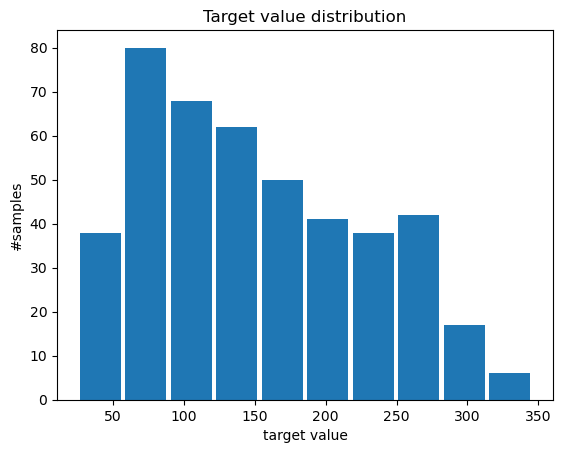

In [8]:
# plot a histogram to visualize the distribution of the "target" value
plt.hist(data.frame['target'], rwidth=0.9)
plt.title("Target value distribution")
plt.xlabel("target value")
plt.ylabel("#samples");

### Prepare data for model training and testing

In [9]:
# Split the data into 70% training and 30% testing
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Remember to set random_state to control for the randomness

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [10]:
# check feature matrix
X_train.shape, X_test.shape

((309, 10), (133, 10))

### Fit the linear regression model on the training set and evaluate model performance on the testing set 
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [11]:
reg = LinearRegression() 
reg.fit(X_train, y_train)
reg_score = reg.score(X_test, y_test)
np.round(reg_score,3)

0.477

**Interpret model coefficients and intercept**

In [12]:
np.round(reg.coef_,3)

array([  29.254, -261.706,  546.3  ,  388.398, -901.96 ,  506.763,
        121.154,  288.035,  659.269,   41.377])

In [13]:
np.round(reg.intercept_,3)

151.008

**Your task**: write down the linear regression model with the above coefficients and intercept

In [14]:
# y = 151.008 + 29.254 * age - 261.706 * sex + 546.3 * bmi + 388.398 * bp -901.96 * x1 + 506.763 * x2 + 121.154 * x3 + 288.03 * x4 + 659.269 * x5 + 41.377 * x6

**Your task**: explore other parameters/attributes/methods
- fit_intercept
- feature_names_in_, n_features_in_
Write your exploration code and results below

In [15]:
reg = LinearRegression(fit_intercept=True)

reg.fit(X_train, y_train)
print("number of features: ", reg.n_features_in_)
print("features names: ", reg.feature_names_in_)

reg_score = reg.score(X_test, y_test)
print("model score: ", np.round(reg_score, 3))

number of features:  10
features names:  ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']
model score:  0.477


### Fit and evaluate a Ridge regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [16]:
rg_reg = Ridge()
rg_reg.fit(X_train, y_train)
rg_reg_score = rg_reg.score(X_test, y_test)
np.round(rg_reg_score,3)

0.423

In [17]:
np.round(rg_reg.coef_,3)

array([  45.054,  -71.947,  280.716,  195.213,   -2.229,  -17.541,
       -148.689,  120.467,  198.614,  106.935])

In [18]:
np.round(rg_reg.intercept_,3)

151.867

### Your task: fit and evaluate a Lasso regression model (with the same train/test data)
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [19]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_score = lasso_reg.score(X_test, y_test)
np.round(lasso_reg_score, 3)

0.362

In [20]:
np.round(lasso_reg.coef_,3)

array([  0.   ,  -0.   , 443.703,  51.601,   0.   ,   0.   ,  -0.   ,
         0.   , 201.966,   0.   ])

In [21]:
np.round(lasso_reg.intercept_,3)

152.166

### Your task: compare the linear/ridge/lasso regression models
- write down your code to create and display the given dataframe

In [29]:
# hint: the following dataframe shows the expected way to organize and display the information
# make sure to: 
# - round to 3 digits after the decimal point
# - rename the column names 
# - include intercept and score in the last two rows
df = pd.DataFrame({
    'linear': np.append(np.round(reg.coef_,3), [np.round(reg.intercept_,3), np.round(reg_score,3)]),
    'ridge': np.append(np.round(rg_reg.coef_,3), [np.round(rg_reg.intercept_,3), np.round(rg_reg_score,3)]),
    'lasso': np.append(np.round(lasso_reg.coef_,3), [np.round(lasso_reg.intercept_,3), np.round(lasso_reg_score,3)])
})

feature_names = list(reg.feature_names_in_)
feature_names += ['intercept', 'score'] 
df.index = feature_names

df

,linear,ridge,lasso
age,29.254,45.054,0.000
sex,-261.706,-71.947,-0.000
bmi,546.300,280.716,443.703
bp,388.398,195.213,51.601
s1,-901.960,-2.229,0.000
s2,506.763,-17.541,0.000
s3,121.154,-148.689,-0.000
s4,288.035,120.467,0.000
s5,659.269,198.614,201.966
s6,41.377,106.935,0.000


**Your observations and thoughts of comparing the three models**
- hint: connect this with what we discussed in the lectures, e.g.
    - how does regularization affect coefficients and model performance 
    - what is the difference between ridge (L2 penalty) and Lasso (L1 penalty) 

In [23]:
# regularization greatly reduces the model performance 
# L2 penalty shrinks some coefficients toward zero, while L1 penalty turns some coefficients to zero

## Polynomial regression
- Use the diabetes data with the same train and test set to fit several **Polynomial regression** models 
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Polynomial transformation for degree 1
poly1 = PolynomialFeatures(degree=1)
X_train_poly1 = poly1.fit_transform(X_train)
lin_reg.fit(X_train_poly1, y_train)
intercept_poly1 = lin_reg.intercept_

# Polynomial transformation for degree 2
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
lin_reg.fit(X_train_poly2, y_train)
intercept_poly2 = lin_reg.intercept_

# Polynomial transformation for degree 3
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
lin_reg.fit(X_train_poly3, y_train)
intercept_poly3 = lin_reg.intercept_

(intercept_poly1, intercept_poly2, intercept_poly3)


(151.00821291456543, -360.91876865461967, 2.371636934848117e+16)

In [25]:
scores = {}
for degree in range(1, 4):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lin_reg.fit(X_train_poly, y_train)
    scores[f'poly_d{degree}'] = lin_reg.score(X_test_poly, y_test)

poly1_score = scores['poly_d1']
poly2_score = scores['poly_d2']
poly3_score = scores['poly_d3']
scores

{'poly_d1': 0.4772897164322615,
 'poly_d2': 0.4129770691622344,
 'poly_d3': -92.5829427663642}

### Your task: compare the polynomial regression models with degree=1/2/3 and the original linear regression model
- please write code to create and display the given data frame

In [30]:
df = pd.DataFrame({
    'linear': [np.round(reg.intercept_,3), np.round(reg_score,3)],
    'poly_d1': [np.round(intercept_poly1,3), np.round(poly1_score,3)],
    'poly_d2': [np.round(intercept_poly2,3), np.round(poly2_score,3)],
    'poly_d3': [np.round(intercept_poly3,3), np.round(poly3_score,3)]
},

index=['intercept', 'score'])

df

,linear,poly_d1,poly_d2,poly_d3
intercept,151.008,151.008,-360.919,2.371637e+16
score,0.477,0.477,0.413,-9.258300e+01


### Your task: observations and thoughts of comparing the above four models
- hint: connect this with overfitting/underfitting we discussed in class

In [31]:
# linear regression is the same as polynomial regression with degree of 1
# higher degrees may lead to overfitting, while lower degrees may lead to underfitting 
# degrees should be decided on the actual relationships in the data

### Your task: interpret the model performance wrt the task itself
- how does each feature relate with diabetes
- which factors contribute positively/negatively/most/least to diabetes
- does these statistical correlations make sense from biological perspective? 

In [32]:
# basded on linear and ridge models, age is positively correlated with diabetes, which makes sense from the aging standpoint
# bmi and bp are consistently positive across models, and bmi seems to be the most influential features

## Linear models for classification: LogisticRegression 
In this section, we will work on a banknote authentication dataset:
- Original data source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication <br>

This dataset contains n = 1372 images of genuine and forged banknote-like specimens. Each image is represented by four features extracted from Wavelet Transform tool: 
    1. variance (continuous) 
    2. skewness (continuous)
    3. curtosis (continuous)
    4. entropy of image (continuous)

And each image has a binary label of 0/1 indicating whether the banknote is forged or genuine.

We will fit several logistic regression models with different parameter settings to analyze this dataset: 
The steps include:
1. Basic data exploration:
    > what does the data look like (#samples, #features) <br>
    > the feature matrix and description of each feature <br>
    > the target values <br>
    
2. Prepare data for model training and testing <br>

3. Fit different logistic regression models (vary by parameter settings) on the training set and evaluate model performance on the testing set <br>

4. Compare and understand model performance through interpreting coefficients.

In [33]:
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [34]:
# please change to your file path
df_data = pickle.load(open('banknote_authentication_dataframe.pickle','rb'))

### Basic dataset exploration

In [35]:
# display the dataset
df_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0.0
1,4.54590,8.16740,-2.4586,-1.46210,0.0
2,3.86600,-2.63830,1.9242,0.10645,0.0
3,3.45660,9.52280,-4.0112,-3.59440,0.0
4,0.32924,-4.45520,4.5718,-0.98880,0.0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1.0
1368,-1.38870,-4.87730,6.4774,0.34179,1.0
1369,-3.75030,-13.45860,17.5932,-2.77710,1.0
1370,-3.56370,-8.38270,12.3930,-1.28230,1.0


In [36]:
# describe the data 
df_data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Prepara data for model training and testing

In [37]:
feature_names = ['variance','skewness','curtosis','entropy']

# Construct feature matrix from the data frame
X_data = df_data[feature_names]
y_data = df_data['class']
X_data.shape, y_data.shape, Counter(y_data)

((1372, 4), (1372,), Counter({0.0: 762, 1.0: 610}))

In [38]:
# split the data into 70% training and 30% testing using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

### Fit LogisticRegression models with different parameter settings
- L1 VS L2 penalty
- C values (inverse of regularization strength)

In [39]:
clf = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=1.0).fit(X_train, y_train)

In [40]:
clf.score(X_test, y_test)

0.9878640776699029

In [41]:
clf.predict(X_test[:3])

array([0., 0., 0.])

In [42]:
np.round(clf.predict_proba(X_test[:3]),3)

array([[1.   , 0.   ],
       [0.982, 0.018],
       [0.996, 0.004]])

**Your task**: explore at least one different set of parameters to re-fit the model: solver, penalty, C

In [43]:
clf_test_1 = LogisticRegression(random_state=0, solver='liblinear', penalty='l1', C=0.2).fit(X_train, y_train)
clf_test_1.score(X_test, y_test)

0.9878640776699029

In [44]:
clf_test_2 = LogisticRegression(random_state=0, solver='newton-cg', penalty='l2', C=0.2).fit(X_train, y_train)
clf_test_2.score(X_test, y_test)

0.9878640776699029

In [45]:
clf_test_3 = LogisticRegression(random_state=0, C=0.3).fit(X_train, y_train)
clf_test_3.score(X_test, y_test)

0.9878640776699029

### Compare model performance with different c values and different penalties

In [48]:
def compare_c(X_train, y_train, X_test, y_test, p):
    """
    X_train/test: 2D feature matrix of training/testing data
    y_train/test: 1D array of training/testing labels
    p: the penalty parameter setting in LogisticRegression
    
    return: 
        a list of classifiers fitted with different c values
        a dataframe that is shown in the running example below
    """
     
    # set the model parameter c to different values and train the model 
    # for c in [0.001, 0.01, 0.1, 1, 10, 100]:
    #    fit a LogisticRegression model with: the current c value, the given penalty p, set random_state=42, max_iter=1000, solver='liblinear', and use default setting for other parameters
    #    test and record the model performance 
    #    get the statistical information about the model coefficients: 
    #        min: minimum coefficient
    #        max: minimum coefficient
    #        mean(abs(coef)): average over the absolute coefficient values
    #        n_zero: number of coefficients equal to zero 
    
    list = []
    
    # iterate through differnet c values 
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        clf = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', penalty=p, C=c).fit(X_train, y_train)
        
        # retrieve statistical info on coefficients
        coef = clf.coef_
        df = [c, coef.min(), coef.max(), abs(coef).mean(), (coef == 0).sum(), clf.score(X_test, y_test)]
        
        # create a dataframe for each model
        df = pd.DataFrame(df).T
        df.columns = ["c", "min", "max", "mean_abs", "n_zero", "test_score"]
        list.append(df)
    
    # concatenate different dataframes 
    df = pd.concat(list)
    df.reset_index(drop=True, inplace=True)
    
    return clf, df
    
    

In [49]:
# running example
l2_clfs, c_effect_l2 = compare_c(X_train, y_train, X_test, y_test, p='l2')
c_effect_l2

,c,min,max,mean_abs,n_zero,test_score
0,0.001,-0.357242,-0.074218,0.189712,0.0,0.922330
1,0.010,-0.860815,-0.172662,0.485241,0.0,0.973301
2,0.100,-1.580581,-0.162763,0.915028,0.0,0.987864
3,1.000,-2.834711,-0.166099,1.645101,0.0,0.987864
4,10.000,-5.171020,-0.289579,2.936961,0.0,0.987864
5,100.000,-7.647564,-0.437990,4.297064,0.0,0.990291


In [50]:
# running example
l1_clfs, c_effect_l1 = compare_c(X_train, y_train, X_test, y_test, p='l1')
c_effect_l1

,c,min,max,mean_abs,n_zero,test_score
0,0.001,-0.041929,0.000000,0.010482,3.0,0.623786
1,0.010,-0.807180,0.000000,0.327752,1.0,0.917476
2,0.100,-1.750236,0.000000,0.935861,1.0,0.987864
3,1.000,-3.838485,-0.132006,2.163931,0.0,0.987864
4,10.000,-7.109730,-0.388707,3.992891,0.0,0.990291
5,100.000,-8.196342,-0.463991,4.595852,0.0,0.990291


**Your thoughts and observations:** 
  - explain model performance from the perspective of under-fitting VS over-fitting
  - compare the two tables and indicate the difference between L1 and L2 penalty
  - how does c affect coefficients and model performance in each table 

In [51]:
# smaller C value may prevent overfitting by reducing variance, but may also increase bias through stronger regularization
# bigger C value may lead to overfitting by increasing variance, but may also reduce bias through weaker regularization 
# L1 penalty may turn some coefficients to zero, potentially reducing overfitting but leading to underfitting with small c value 
# L2 penalty may shrink some coefficients toward zero but keeps them, therefore not leading to underfitting with small c value 

### Interpret the model performance wrt the banknote authentication task
- how does each feature relate with the identification of genuine and forged banknote
- does these statistical correlations make sense from the perspective of image recognition 

In [52]:
clf.coef_

array([[-3.85152883, -2.11687242, -2.58471858, -0.13330502]])

In [53]:
# variance, skewness, and curtosis have high correlations, while entropy has reltively low correlations 
# it's probably because entropy is a more general measurement and can be influenced by image quality 

## Summary
Congratulations for completing this exercise! In this notebook, with hands-on practice of linear models for regression and classification tasks, we gain deep understanding of:
- overfitting VS underfitting
- difference between l1 and l2 regularizations
- the effect of regularization strength on model performance

## Which part(s) you find most interesting/chanlleging?

In [54]:
# I really enjoyed writing functions to compare models